In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import mysql.connector

In [4]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1122',
    database='ecommerce'
)
cur = db.cursor()

# Begineer

# List all the unique cities where customers are located 

In [3]:
querry = """ select distinct customer_city from customers """
cur.execute(querry)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# count the number of orders placed in 2017

In [4]:
querry = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(querry)
data = cur.fetchall()
data

[(90202,)]

# find the total sale per Category 

In [5]:
querry = """ select upper(products.product_category) category , 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """
cur.execute(querry)
data = cur.fetchall()
data
df = pd.DataFrame(data , columns=["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,2026954.64
1,FURNITURE DECORATION,5720705.57
2,TELEPHONY,1947528.20
3,BED TABLE BATH,6850214.68
4,AUTOMOTIVE,3409177.32
...,...,...
69,CDS MUSIC DVDS,4797.72
70,LA CUISINE,11654.12
71,FASHION CHILDREN'S CLOTHING,3142.68
72,PC GAMER,8697.72


# Calculate the % of orders that were placed on installment 

In [6]:
querry = """ select sum(case when payment_installments >=1 then 1 
else 0 end )/ count(*) * 100 from payments
"""
cur.execute(querry)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the Number of customers from each state 

In [7]:
querry = """ select customer_state , count(customer_id) from customers group by customer_state 
"""
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["Customer_state","Total_Customers"])
df = df.sort_values(by="Total_Customers",ascending=False)
df.head()

,Customer_state,Total_Customers
0,SP,83492
4,RJ,25704
2,MG,23270
5,RS,10932
3,PR,10090


# Now Plot a bar graph

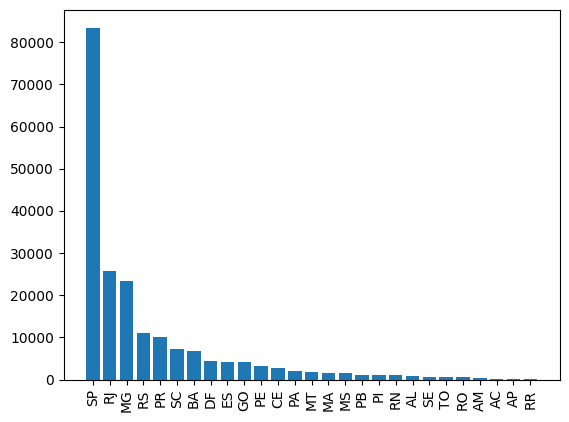

In [8]:
plt.bar(df["Customer_state"],df["Total_Customers"])
plt.xticks(rotation = 90)
plt.show()

# Intermediate

# Calculate the number of order per month in 2018

In [9]:
querry = """select monthname(order_purchase_timestamp) months ,
count(order_id) order_id 
from orders where year(order_purchase_timestamp) = 2018
group by months; """
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data , columns=["Months_Name","Total_Orders"])
df

,Months_Name,Total_Orders
0,July,12584
1,August,13024
2,February,13456
3,June,12334
4,March,14422
5,January,14538
6,May,13746
7,April,13878
8,September,32
9,October,8


# Now Plot It on Graph

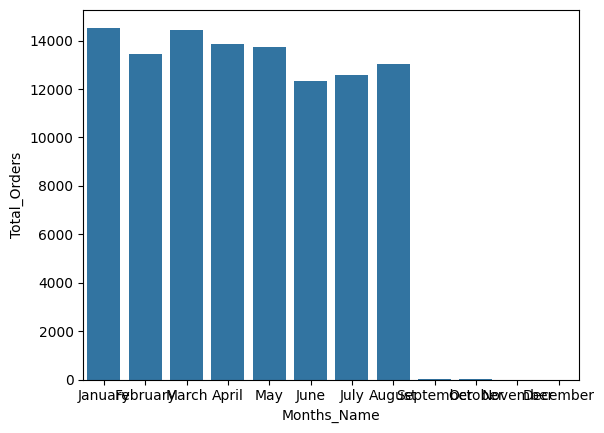

In [10]:
o = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.barplot(data = df , x=df["Months_Name"],y=df["Total_Orders"], order= o)
plt.show()

# Find the average No of product per order grouped by customer city 

In [11]:
querry = """ with count_perorder as (select orders.order_id , orders.customer_id , count(order_items.order_id) as oc 
from orders join order_items
on orders.order_id = order_items.order_id 
group by orders.order_id , orders.customer_id )
select customers.customer_city , round(avg(count_perorder.oc),2)
from customers join count_perorder
on customers.customer_id = count_perorder.customer_id
group by customers.customer_city """
cur.execute(querry)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns=["Customer_City","Average_Prod / Order" ])
df

,Customer_City,Average_Prod / Order
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
...,...,...
4105,buriti,6.00
4106,tibau do sul,2.00
4107,morro agudo de goias,2.00
4108,sao mamede,2.00


# calculate the % of total revenue contributed by each product

In [12]:
querry = """ select upper(products.product_category )category , 
round((sum(payments.payment_value) / (select sum(payment_value) from payments)) * 100,2)
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category; """
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data , columns=["Products","Total%_revenue"])
df

,Products,Total%_revenue
0,PERFUMERY,6.33
1,FURNITURE DECORATION,17.87
2,TELEPHONY,6.08
3,BED TABLE BATH,21.40
4,AUTOMOTIVE,10.65
...,...,...
69,CDS MUSIC DVDS,0.01
70,LA CUISINE,0.04
71,FASHION CHILDREN'S CLOTHING,0.01
72,PC GAMER,0.03


# identify the corelation btw product price and number of time a product purhase 

In [13]:
querry = """ select upper(products.product_category) Category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id 
group by category; """
cur.execute(querry)
data = cur.fetchall()
data
df = pd.DataFrame(data , columns=["Product","Order_count","Price"])
df
arr1 = df["Order_count"]
arr2 = df["Price"]
corr = np.corrcoef(arr1,arr2)
corr
print("The Value OF Corelation Between product Price and Number of time a product Purchase is",corr[0][1])

The Value OF Corelation Between product Price and Number of time a product Purchase is -0.10631514167157562


# calculate the revenue By each Seller And rank Them by revenue

In [14]:
querry = """ select * , dense_rank() over (order by revenue desc) as Rn from
(select order_items.seller_id seller_id, sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by seller_id) as A; """
cur.execute(querry)
data  =cur.fetchall()
df = pd.DataFrame(data , columns=["Seller_Id","Revenue","Rank"])
df

,Seller_Id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,1.014334e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,6.164441e+05,2
2,4a3ca9315b744ce9f8e9374361493884,6.024905e+05,3
3,1f50f920176fa81dab994f9023523100,5.805068e+05,4
4,53243585a1d6dc2643021fd1853d8905,5.698062e+05,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,3.842000e+01,3082
3091,702835e4b785b67a084280efca355756,3.712000e+01,3083
3092,4965a7002cca77301c82d3f91b82e1a9,3.272000e+01,3084
3093,77128dec4bec4878c37ab7d6169d6f26,3.044000e+01,3085


# Advanced

# Calculate the Moving average of order Values for each customer Over Their Order History 

In [15]:
querry = """ select customer_id , order_purchase_timestamp,payment,
 avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_Avg
from
(select orders.customer_id , orders.order_purchase_timestamp , payments.payment_value as payment
from payments join orders 
on payments.order_id = orders.order_id ) as a  """
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data ,columns=["Customer_Id","Order_Timestamp" ,"Payments" , "Mov_avg" ])
df

,Customer_Id,Order_Timestamp,Payments,Mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate cumulative Sale per month per year 

In [17]:
querry = """select years , months , payment ,  sum(payment)
over (order by years , months)cummulitve_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months , 
sum(payments.payment_value) as payment from orders join payments
on orders.order_id = payments.payment_value 
group by years , months order by years , months ) as A; """
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data , columns=["Years" , "Months" , "Payment","Commulative_Sales"])
df

,Years,Months,Payment,Commulative_Sales
0,2016,9,0.0,0.0
1,2016,10,360072.0,360072.0
2,2016,12,0.0,360072.0
3,2017,1,607128.0,967200.0
4,2017,2,1416372.0,2383572.0
5,2017,3,2304184.0,4687756.0
6,2017,4,2056356.0,6744112.0
7,2017,5,3180624.0,9924736.0
8,2017,6,2765740.0,12690476.0
9,2017,7,3395988.0,16086464.0


# Calculate The YEar Over Year Growth rate of total_Sales

In [19]:
querry = """ select years , ((payment-lag(payment,1) over (order by years))
/lag(payment,1) over (order by years)) * 100 as yoy_growth  from 
(select year(orders.order_purchase_timestamp) as years, 
sum(payments.payment_value) as payment from orders join payments
on orders.order_id = payments.payment_value 
group by years  order by years )as a;"""
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data , columns=["Years","Yoy_%_growth"])
df

,Years,Yoy_%_growth
0,2016,NaN
1,2017,10592.233775
2,2018,19.520745


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [22]:
querry = """with a  as (select customers.customer_id customer_id, 
min(orders.order_purchase_timestamp) first_order 
from customers join orders 
on customers.customer_id = orders.customer_id
group by customers.customer_id ),

b as (select a.customer_id ,count(distinct orders.order_purchase_timestamp) next_order
from a join orders 
on orders.customer_id = a .customer_id
and orders.order_purchase_timestamp > first_order 
and orders.order_purchase_timestamp <
date_add(first_order , interval 6 month)
group by a.customer_id)
select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b 
on a.cutomer_id = b.cutomer-id
; """
cur.execute(querry)
data = cur.fetchall()
data

ProgrammingError: 1054 (42S22): Unknown column 'a.cutomer_id' in 'on clause'

# Identify Top 3 customers Who Spend Most Of Money in each year ?

In [5]:
querry = """ select years , customer_id , payment , d_rank
from
(select year(orders.order_purchase_timestamp) years, 
orders.customer_id , 
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)order by sum(payments.payment_value)desc) d_rank
from payments join orders 
on orders.order_id = payments.order_id 
group by year(orders.order_purchase_timestamp)  , 
orders.customer_id) as a
where d_rank <= 3 ;"""
cur.execute(querry)
data = cur.fetchall()
df = pd.DataFrame(data , columns=["Years","Customer_id","Payments","D_rank"])
df

,Years,Customer_id,Payments,D_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,5694.200195,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,5602.959961,2
2,2016,4a06381959b6670756de02e07b83815f,4911.120117,3
3,2017,1617b1357756262bfa56ab541c47bc16,54656.320312,1
4,2017,c6e2731c5b391845f6800c97401a43a9,27717.240234,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,26906.640625,3
6,2018,ec5b2ba62e574342386871631fafd3fc,29099.519531,1
7,2018,f48d464a0baaea338cb25f816991ab1f,27688.839844,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,19237.759766,3


# Now Plot It In Graph 

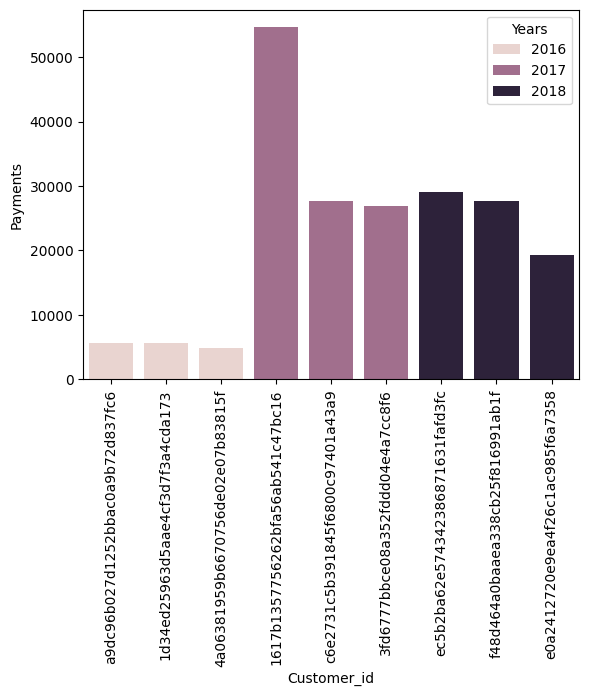

In [7]:
sns.barplot(x="Customer_id", y="Payments",hue="Years",data=df)
plt.xticks(rotation = 90)
plt.show() 
